In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import matplotlib.patches as patches
from mtcnn import MTCNN

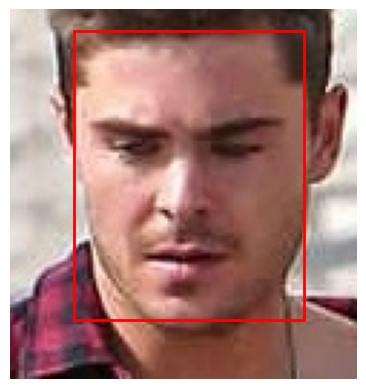

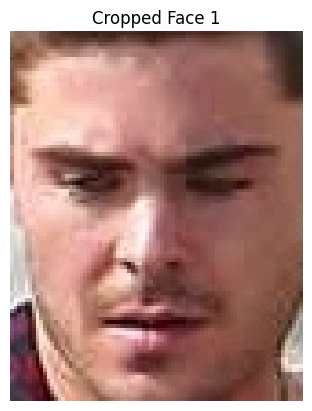

In [3]:


# Function to perform face detection, display the image with bounding boxes, and crop faces
def detect_and_display_faces(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to RGB for compatibility with MTCNN
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Load the pre-trained MTCNN model
    detector = MTCNN()

    # Perform face detection
    faces = detector.detect_faces(img_rgb)

    # Display the original image
    fig, ax = plt.subplots()
    ax.imshow(img_rgb)

    cropped_faces = []  # List to store cropped faces
    # Add bounding boxes for each detected face and crop them
    for face in faces:
        x, y, w, h = face['box']
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Crop the face from the image
        cropped_face = img[y:y + h, x:x + w]
        cropped_faces.append(cropped_face)

    plt.axis('off')
    plt.show()

    # Display cropped faces
    for i, face in enumerate(cropped_faces):
        plt.figure()
        plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Cropped Face {i + 1}')
        plt.show()

# Specify the path to the main directory
main_directory = r"D:\dataFaces\archive\105_classes_pins_dataset"

# Get a list of all folders
all_folders = [folder for folder in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, folder))]

# Randomly pick a folder
selected_folder = random.choice(all_folders)
folder_path = os.path.join(main_directory, selected_folder)

# Get a list of all images in the selected folder
all_images = [img for img in os.listdir(folder_path) if img.endswith('.jpg')]

# Randomly pick an image from the folder
selected_image = random.choice(all_images)
image_path = os.path.join(folder_path, selected_image)

# Perform face detection using MTCNN and display the result
detect_and_display_faces(image_path)


In [ ]:


# Function to crop faces from an image and save them to the destination folder
def crop_and_save_faces(source_dir, destination_dir):
    # Initialize MTCNN detector
    detector = MTCNN()

    # Create the destination directory if it doesn't exist
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    # List to store paths of images without detected faces
    no_face_detected_paths = []

    # Loop through each folder (celebrity) in the dataset
    for folder in os.listdir(source_dir):
        person_folder = os.path.join(source_dir, folder)
        dest_folder = os.path.join(destination_dir, folder)

        # Create a folder for each celebrity in the destination directory
        if not os.path.exists(dest_folder):
            os.makedirs(dest_folder)

        # Loop through each image in the celebrity folder
        for img_file in os.listdir(person_folder):
            img_path = os.path.join(person_folder, img_file)
            img = cv2.imread(img_path)
            if img is None:
                continue

            # Convert BGR to RGB for MTCNN
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            faces = detector.detect_faces(img_rgb)

            # Check if any faces were detected
            if not faces:
                # If no faces are detected, add the image path to the list
                no_face_detected_paths.append(img_path)
                continue  # Skip to the next image

            # Crop and save faces
            for i, face in enumerate(faces):
                x, y, w, h = face['box']
                # Crop the face from the image
                cropped_face = img[y:y + h, x:x + w]
                
                # Resize the cropped face to 224x224
                cropped_face_resized = cv2.resize(cropped_face, (224, 224))

                # Save the cropped image
                cropped_image_path = os.path.join(dest_folder, f"{img_file.split('.')[0]}_cropped_{i}.jpg")
                cv2.imwrite(cropped_image_path, cropped_face_resized)

    # Print the paths of images without detected faces
    print("Images without detected faces:")
    for path in no_face_detected_paths:
        print(path)

# Path to the original dataset
source_directory  = r"D:\dataFaces\archive\105_classes_pins_dataset"

# Path to the new cropped dataset 
destination_directory = r'D:\dataFaces\cropped'

# Crop faces and save them in the new dataset
crop_and_save_faces(source_directory, destination_directory)


In [3]:
import json

# Function to crop faces from an image and save them to the destination folder
def crop_and_save_faces(source_dir, destination_dir, bbox_file):
    # Initialize MTCNN detector
    detector = MTCNN()

    # Create the destination directory if it doesn't exist
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    # Dictionary to store bounding boxes for each image
    bounding_boxes = {}

    # Loop through each folder (celebrity) in the dataset
    for folder in os.listdir(source_dir):
        person_folder = os.path.join(source_dir, folder)
        dest_folder = os.path.join(destination_dir, folder)

        # Create a folder for each celebrity in the destination directory
        if not os.path.exists(dest_folder):
            os.makedirs(dest_folder)

        # Loop through each image in the celebrity folder
        for img_file in os.listdir(person_folder):
            img_path = os.path.join(person_folder, img_file)
            img = cv2.imread(img_path)
            if img is None:
                continue

            # Convert BGR to RGB for MTCNN
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            faces = detector.detect_faces(img_rgb)

            # Store bounding boxes
            bounding_boxes[img_file] = []

            # Check if any faces were detected
            if not faces:
                continue  # Skip to the next image

            # Crop and save faces
            for i, face in enumerate(faces):
                x, y, w, h = face['box']
                # Crop the face from the image
                cropped_face = img[y:y + h, x:x + w]
                
                # Resize the cropped face to 224x224
                cropped_face_resized = cv2.resize(cropped_face, (224, 224))

                # Save the cropped image
                cropped_image_path = os.path.join(dest_folder, f"{img_file.split('.')[0]}_cropped_{i}.jpg")
                cv2.imwrite(cropped_image_path, cropped_face_resized)

                # Append the bounding box to the list
                bounding_boxes[img_file].append([x, y, w, h])

    # Save bounding boxes to a JSON file
    with open(bbox_file, 'w') as f:
        json.dump(bounding_boxes, f)

# Path to the original dataset
source_directory  = r"D:\dataFaces\archive\105_classes_pins_dataset"
# Path to the new cropped dataset 
destination_directory = r'D:\dataFaces\cropped2'
# Path to save bounding boxes
bounding_boxes_file = r'D:\dataFaces\bounding_boxes.json'

# Crop faces and save them in the new dataset along with bounding boxes
crop_and_save_faces(source_directory, destination_directory, bounding_boxes_file)
